In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append("../datasets/")
sys.path.append("../")
import utils
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
from umap import UMAP
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

# Preprocessing: Experimental Place Cells

This notebook provides context to explain:
- the raw data provided in matlab's files
- the preprocessing of the experimental place cells, for experiment 34.

In [4]:

expt34 = utils.loadmat("../data/expt34.mat")

In [5]:
expt34.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x'])

In [6]:
expt34["x"]

{'rat': 637,
 'day': 6,
 'epoch': 'm1',
 'type': 'recalibration',
 'finalGain': 1,
 'rosdata': {'name': 'm1',
  'startTs': 361159799,
  'stopTs': 3324086342.0,
  'encTimes': array([3.61160505e+08, 3.61171038e+08, 3.61180586e+08, ...,
         3.32406152e+09, 3.32407161e+09, 3.32408187e+09]),
  'encAngle': array([ 4446.04852284,  4446.04852284,  4446.04852284, ...,
         22023.44647206, 22023.44647206, 22023.44647206]),
  'subepochs': {'name': 'm1a', 'startTs': 361159799, 'stopTs': 2200905388.0},
  'landAngle': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  'gain': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
  'vel': array([-0.64775596, -0.75541741, -0.84847871, ...,  0.03892294,
          0.02972   ,  0.01985613]),
  'relAngle': array([ 4446.04852284,  4446.04852284,  4446.04852284, ...,
         22023.44647206, 22023.44647206, 22023.44647206]),
  'landOffTime': 2200905385.5,
  'landOffAngle': 15246.583190808291,
  'landOffIdx': 183980,
  'estGain': array([1., 1., 1., ..., 1., 1., 

In [7]:
metadata = list(expt34["x"].keys())
print(f"You can find metadata about:\n {metadata}.")

You can find metadata about:
 ['rat', 'day', 'epoch', 'type', 'finalGain', 'rosdata', 'clust', 'specGain'].


### Extracting Angles Information

In [8]:
rosdata = expt34["x"]["rosdata"]
enctimes = rosdata["encTimes"]
velocity = expt34["x"]["rosdata"]["vel"]
encangle = rosdata["encAngle"]
len(encangle) == len(enctimes)
print(len(encangle))

296299


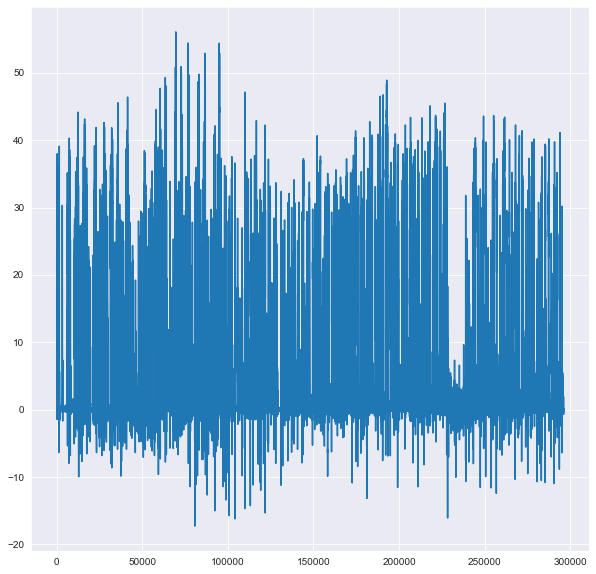

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(velocity)

In [10]:
diff_enctimes = enctimes[1:] - enctimes[:-1]

In [11]:
diff_enctimes

array([10533.25,  9547.75, 10203.  , ...,  9648.  , 10096.5 , 10260.5 ])

In [12]:
enctimes[0]

361160505.0

### Extracting cell firing

In [13]:
n_cells = len(expt34["x"]["clust"])

In [14]:
print(f"There are {n_cells} cells/units/clusters recorded in this experiment.")

There are 40 cells/units/clusters recorded in this experiment.


In [15]:
clust0 = expt34["x"]["clust"][0]
firing_times0 = clust0["ts"]
print(f"These are the times at which clust0 has fired:\n {firing_times0}.")

These are the times at which clust0 has fired:
 [3.68628787e+08 3.68635519e+08 3.68852857e+08 ... 3.07833970e+09
 3.07834393e+09 3.28162030e+09].


In [16]:
firing_times0[0]  

368628787.0

In [17]:
len(firing_times0)

1319

In [18]:
times = []
for clust in expt34["x"]["clust"]:
    times.extend(clust["ts"])
    
times = sorted(times)
n_times = len(times)
print(f"Number of times before deleting duplicates: {n_times}.")
aux = []
for time in times:
    if time not in aux:
        aux.append(time)
n_times = len(aux)
print(f"Number of times after deleting duplicates: {n_times}.")
times = aux

Number of times before deleting duplicates: 41889.
Number of times after deleting duplicates: 41849.


Exploring histogram of time steps to choose a binsize.

In [19]:
times = np.array(times)
print(times.shape)
diff_times = times[1:] - times[:-1]

(41849,)


In [20]:
diff_times.shape

(41848,)

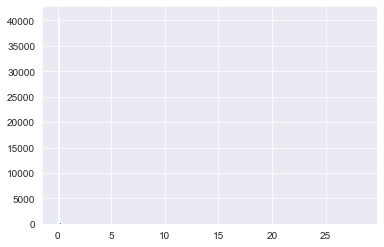

In [21]:
import matplotlib.pyplot as plt

plt.hist(diff_times * 1e-6, bins=200)
plt.show()

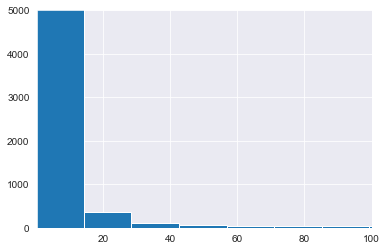

In [22]:
import matplotlib.pyplot as plt

plt.hist(diff_times * 1e-4, bins=200)
plt.xlim(0.1, 100)
plt.ylim(0, 5000)
plt.show()

In [23]:
delta_time = 1000000
regular_times = np.arange(start=times[0], stop=times[-1], step=delta_time)

In [24]:
diff_regular_times = regular_times[1:] - regular_times[:-1]
diff = regular_times[2] - regular_times[1]
assert sum(diff_regular_times != diff) == 0

In [25]:
print(len(times))
print(len(regular_times))

41849
2954


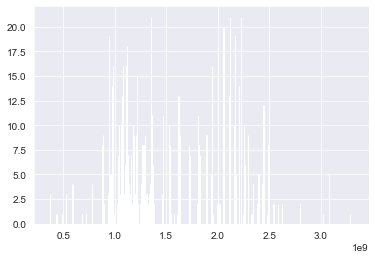

In [26]:
cell0 = expt34["x"]["clust"][0]
ts0 = cell0["ts"]

counts, bins, _ = plt.hist(ts0, bins=regular_times)

In [27]:
sum(bins != regular_times)

0

In [28]:
type(counts)
counts.shape

(2953,)

Processing cell 0...
Processing cell 1...
Processing cell 2...
Processing cell 3...
Processing cell 4...
Processing cell 5...
Processing cell 6...
Processing cell 7...
Processing cell 8...
Processing cell 9...
Processing cell 10...
Processing cell 11...
Processing cell 12...
Processing cell 13...
Processing cell 14...
Processing cell 15...
Processing cell 16...
Processing cell 17...
Processing cell 18...
Processing cell 19...
Processing cell 20...
Processing cell 21...
Processing cell 22...
Processing cell 23...
Processing cell 24...
Processing cell 25...
Processing cell 26...
Processing cell 27...
Processing cell 28...
Processing cell 29...
Processing cell 30...
Processing cell 31...
Processing cell 32...
Processing cell 33...
Processing cell 34...
Processing cell 35...
Processing cell 36...
Processing cell 37...
Processing cell 38...
Processing cell 39...


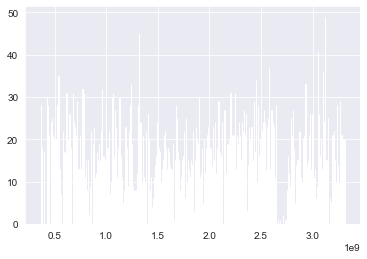

In [30]:
n_times = len(regular_times) - 1
place_cells = np.zeros((n_times, n_cells))

for i_cell, cell in enumerate(expt34["x"]["clust"]):
    print(f"Processing cell {i_cell}...")
    counts, bins, _ = plt.hist(cell["ts"], bins=regular_times)
    assert sum(bins != regular_times) == 0
    assert len(counts) == n_times
    place_cells[:, i_cell] = counts

In [31]:
place_cells.shape

(2953, 40)

In [32]:
np.max(place_cells)

49.0

In [33]:
np.min(place_cells)

0.0

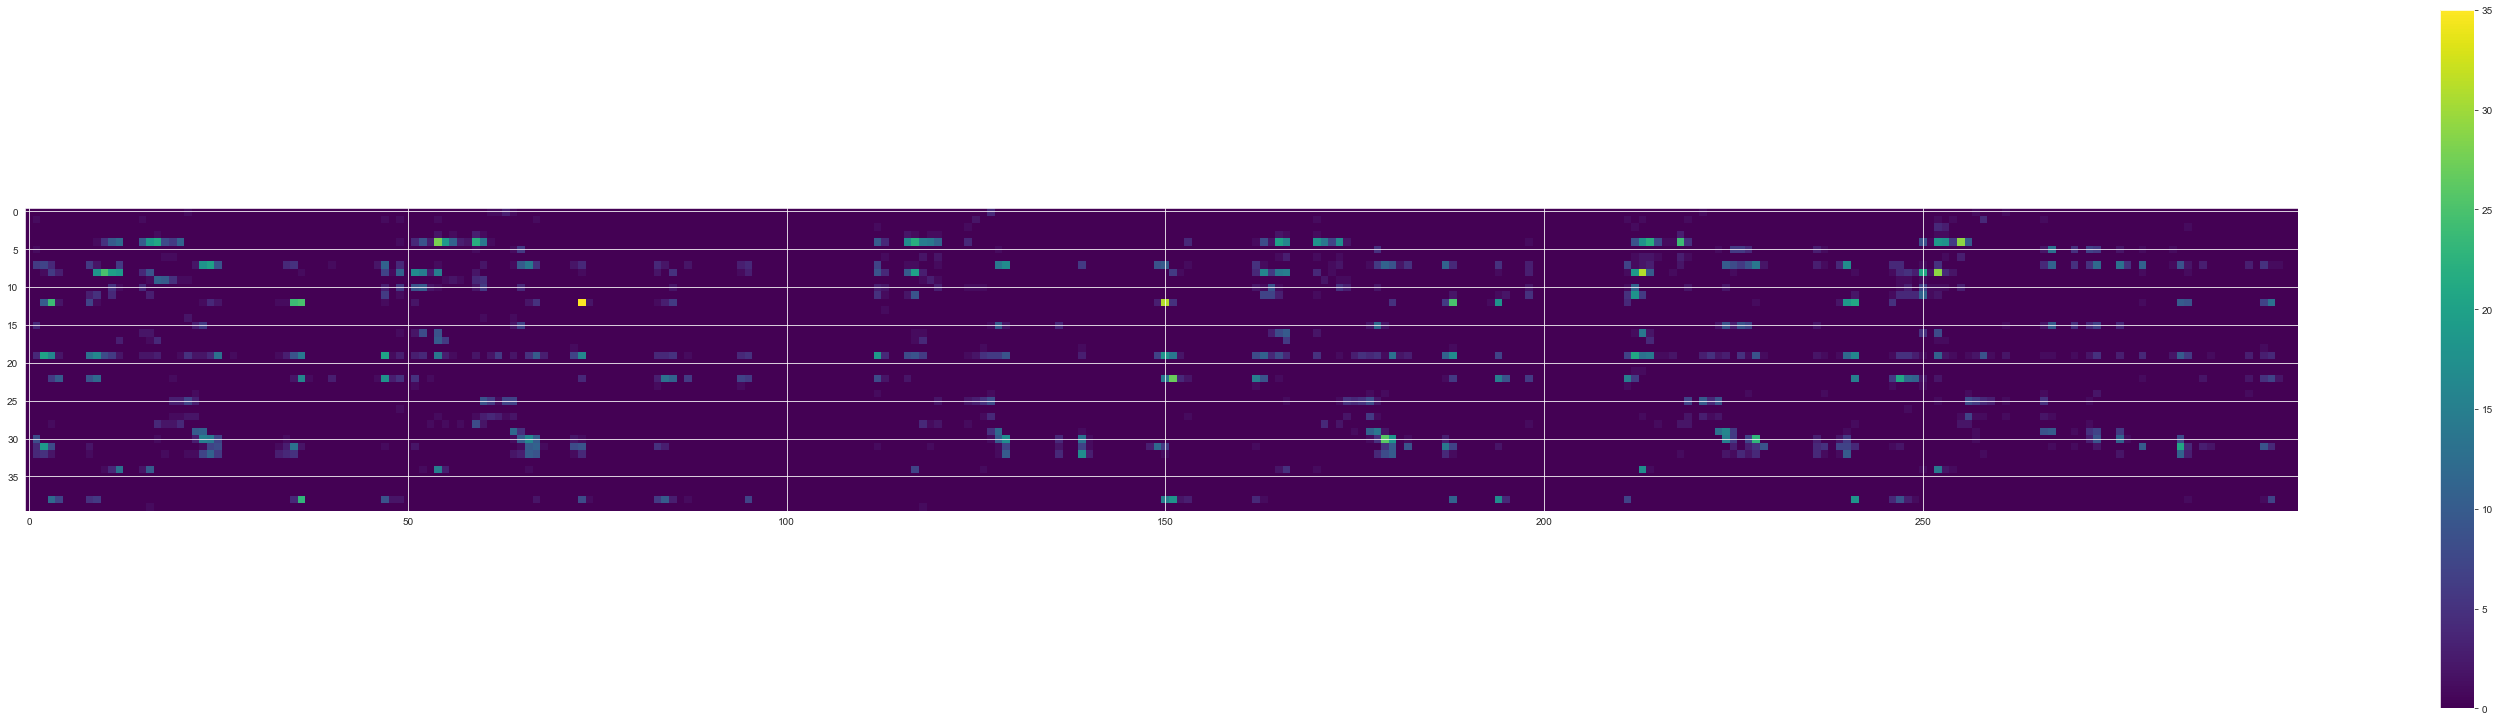

In [34]:
plt.figure(figsize = (40, 10))
plt.imshow(place_cells[100:400,].T, cmap="viridis")
plt.tight_layout()
plt.colorbar()

In [32]:
np.save("place_cells_expt34_b.npy", place_cells)

## Standardize Neuron Responses

In [35]:
place_cells_normalized = place_cells - place_cells.mean()
place_cells_normalized = place_cells_normalized / place_cells_normalized.std()
place_cells.shape

(2953, 40)

# Bin the rat's position


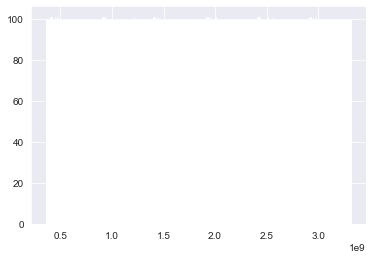

In [36]:
enc_counts, enc_bins, _ = plt.hist(enctimes, bins=regular_times)

In [37]:
averaged_encangles = []
cum_count = 0
for count in enc_counts:
    averaged_encangles.append(np.mean(encangle[cum_count:cum_count+int(count)]))
    cum_count += int(count)
assert len(averaged_encangles) == len(regular_times) -1

In [38]:
mod360_encangles = [x % 360 for x in averaged_encangles]

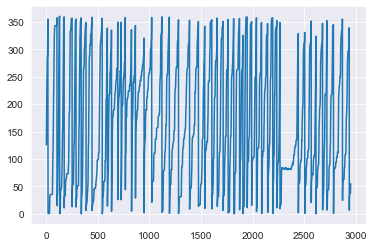

In [39]:
plt.plot(mod360_encangles)

In [40]:
np.save("rat_angles_expt34_b.npy", mod360_encangles)

## Bin the rat's velocity

In [41]:
averaged_velocity = []
cum_count = 0
for count in enc_counts:
    averaged_velocity.append(np.mean(velocity[cum_count:cum_count+int(count)]))
    cum_count += int(count)
assert len(averaged_velocity) == len(regular_times) -1

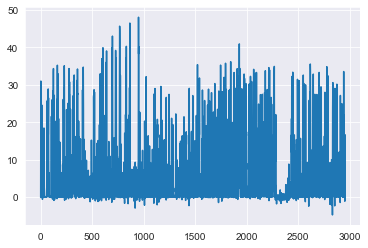

In [42]:
plt.plot(averaged_velocity)

In [43]:
bins = np.arange(np.round(min(averaged_velocity), 0), np.round(max(averaged_velocity), 0) + 5, 5)
idx = np.digitize(averaged_velocity, bins, right=False)
binned_velocity = bins[idx]

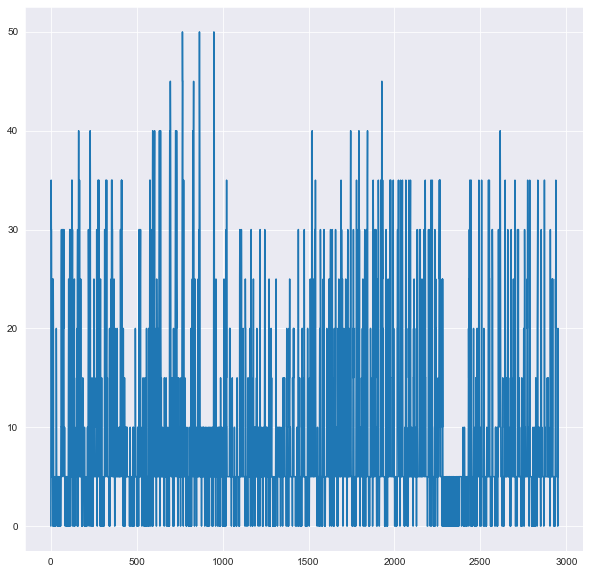

In [44]:
plt.figure(figsize=(10, 10))
plt.plot(binned_velocity)

In [45]:
binned_velocity.min()

0.0

In [46]:
binned_velocity.max()

50.0

## Get Probability Distributions from Neurons

In [47]:
bins = np.arange(0, 360)
dists = np.zeros((40, 360))
for i in range(place_cells.shape[1]):
    for j in range(place_cells.shape[0]):
        angle = int(mod360_encangles[j])
        r = place_cells[j, i]
        dists[i, angle] += r
dists /= dists.sum(axis=-1, keepdims=True)

In [48]:
place_cells.shape

(2953, 40)

In [49]:
# np.histogram(place_cells[:, 0], bins=180);

In [50]:
len(mod360_encangles)

2953

In [51]:
loop = 0
loop_labels = [loop]
for i in range(len(mod360_encangles) - 1):
    t = mod360_encangles[i]
    t_1 = mod360_encangles[i + 1]
    if abs(t_1 - t) > 300:
        loop += 1
    loop_labels.append(loop)

In [52]:
neuron_labels = [str(x) for x in range(40)]

In [53]:
df = pd.DataFrame({"rate": place_cells.reshape(-1), 
                   "neuron": np.tile(neuron_labels, place_cells.shape[0]),  
                   "loop": np.repeat(loop_labels, 40), 
                   "angle": np.repeat(mod360_encangles, 40), 
                   "angle_int": np.repeat([int(x) for x in mod360_encangles], 40)})

In [54]:
df.head()

rate neuron  loop       angle  angle_int
0   0.0      0     0  125.815085        125
1   0.0      1     0  125.815085        125
2   0.0      2     0  125.815085        125
3   0.0      3     0  125.815085        125
4  28.0      4     0  125.815085        125

<AxesSubplot:xlabel='angle_int', ylabel='rate'>

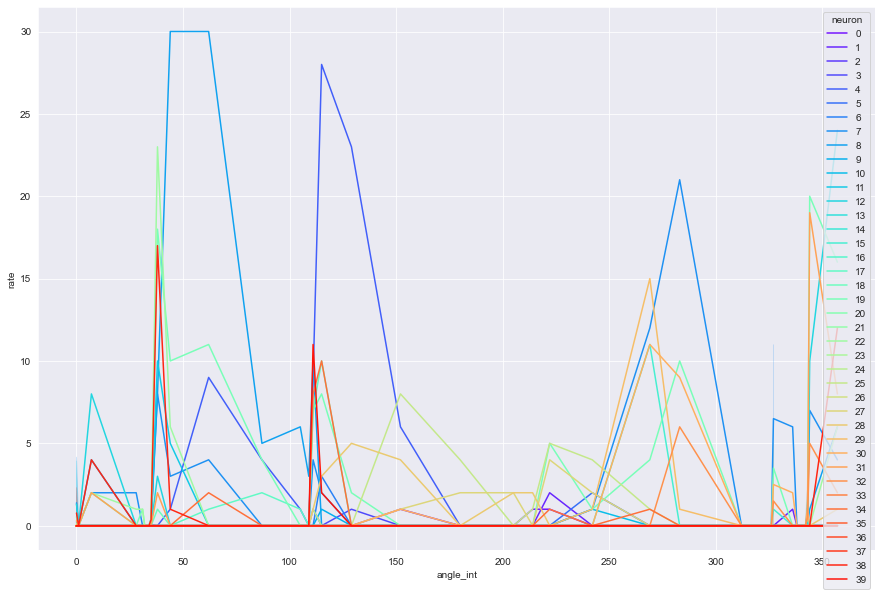

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="angle_int", y="rate", hue="neuron", data=df[df.loop ==1 ], palette="rainbow")

In [56]:
bins = np.arange(20, 380, 20)
idxs = np.digitize(mod360_encangles, bins=bins)
discrete_angles = bins[idxs]

In [57]:
# bins = np.arange(0, 360)
bins = np.arange(20, 380, 20)
dists = np.zeros((40, len(bins)))
for i in range(place_cells.shape[1]):
    for j in range(place_cells.shape[0]):
        angle = np.digitize(mod360_encangles[j], bins=bins, right=False)
        r = place_cells[j, i]
        dists[i, angle] += r
dists /= dists.sum(axis=-1, keepdims=True)

In [58]:
# bins = np.arange(20, 380, 20)
# dists_per_loop = []

# for l in range(50):
#     dists = np.zeros((40, len(bins)))
#     idxs = [i for i,x in enumerate(loop_labels) if x == l]
#     for i in range(place_cells.shape[1]):
#         for j in idxs:
#             angle = np.digitize(mod360_encangles[j], bins=bins, right=False)
#             r = place_cells[j, i]
#             dists[i, angle] += r
#     dists /= dists.sum(axis=-1, keepdims=True) + 1e-10
#     dists_per_loop.append(dists)
# dists_per_loop = np.array(dists_per_loop)
# dists_per_loop.shape
# animated_video(dists_per_loop)

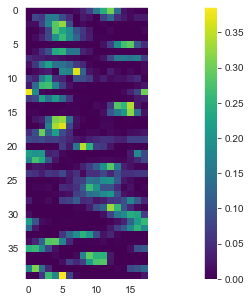

In [59]:
sns.set_style("dark")
plt.figure(figsize=(20, 5))
plt.imshow(dists, cmap="viridis")
plt.colorbar()

In [60]:
import networkx as nx
import matplotlib

def plot_activity_on_graph(sequence, spike_dist, node_size=512, mx=None, mn=None, cmap="magma_r"):
    """ This plots all transitions based on the final sequence
    
    Argument:
    ==============================
    
    sequence:       list
                    the order in which the sequence is

    order:          str (poke|state)
                    this specifies whether spks in ordered
                    in terms of pokes in physical space or in terms the
                    abstract states in the task and will change how it is plotted accordingly
    
    """
    discretization = len(sequence[:-1])
    x_ = np.linspace(0, 2 * np.pi, num=discretization).tolist()
    tmp = np.linspace(0, 2 * np.pi,num=discretization)
    pos = np.vstack([np.sin(tmp),np.cos(tmp)]).T
        
    G = nx.DiGraph()

    if mx is None: 
        mx = np.max(spike_dist)
    if mn is None: 
        mn = 0
    
    cmap = matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=mn, vmax=mx, clip=True), cmap=cmap)

    for i, x in enumerate(sequence[:-1]):
        c = spike_dist[i]
        G.add_node(x, pos=pos[i], color=cmap.to_rgba(c))
        
    all_transitions = get_all_transitions(sequence[:-1])
    for e in all_transitions:
        G.add_edge(int(e[0]),int(e[-1]))
        
    node_colors = nx.get_node_attributes(G, 'color')

    nx.draw_circular(G,
                     edge_color='.3',
                     node_color=np.array(list(node_colors.values())),
                     node_size=node_size,
                     connectionstyle="arc3,rad=-0.1",
                     width=2,
                     with_labels=False)

    label_seq = {x: x for x in sequence[:-1]}
    pos_ = nx.drawing.layout.circular_layout(G)
    nx.draw_networkx_labels(G, pos_, label_seq)

        
def get_all_transitions(seq):
    all_transitions = []
    lseq = len(seq)
    s2 = seq
    for kk,pk in enumerate(s2):
        all_transitions.append((pk, seq[(kk+1)%lseq]))
        # all_transitions.append(str(pk) + '_' + str(seq[(kk+1)%lseq]))

    for kk,pk in enumerate(s2[::-1]):
        all_transitions.append((pk, seq[::-1][(kk+1)%lseq]))
        # all_transitions.append(str(pk) + '_' + str(seq[::-1][(kk+1)%lseq]))
    return all_transitions


In [61]:
dists.max(axis=-1).shape

(40,)

In [62]:
max_orientations = np.argsort(dists.argmax(axis=-1))

In [63]:
dists.argmax(axis=-1)

array([12,  3,  5,  4,  5, 15,  5, 14,  3,  7,  3,  3,  0,  2, 15, 15,  5,
        5,  2,  2,  8,  0,  1, 12, 13, 12,  9, 12, 15, 12, 15, 17, 16,  8,
        4,  1,  9, 11,  1,  5])

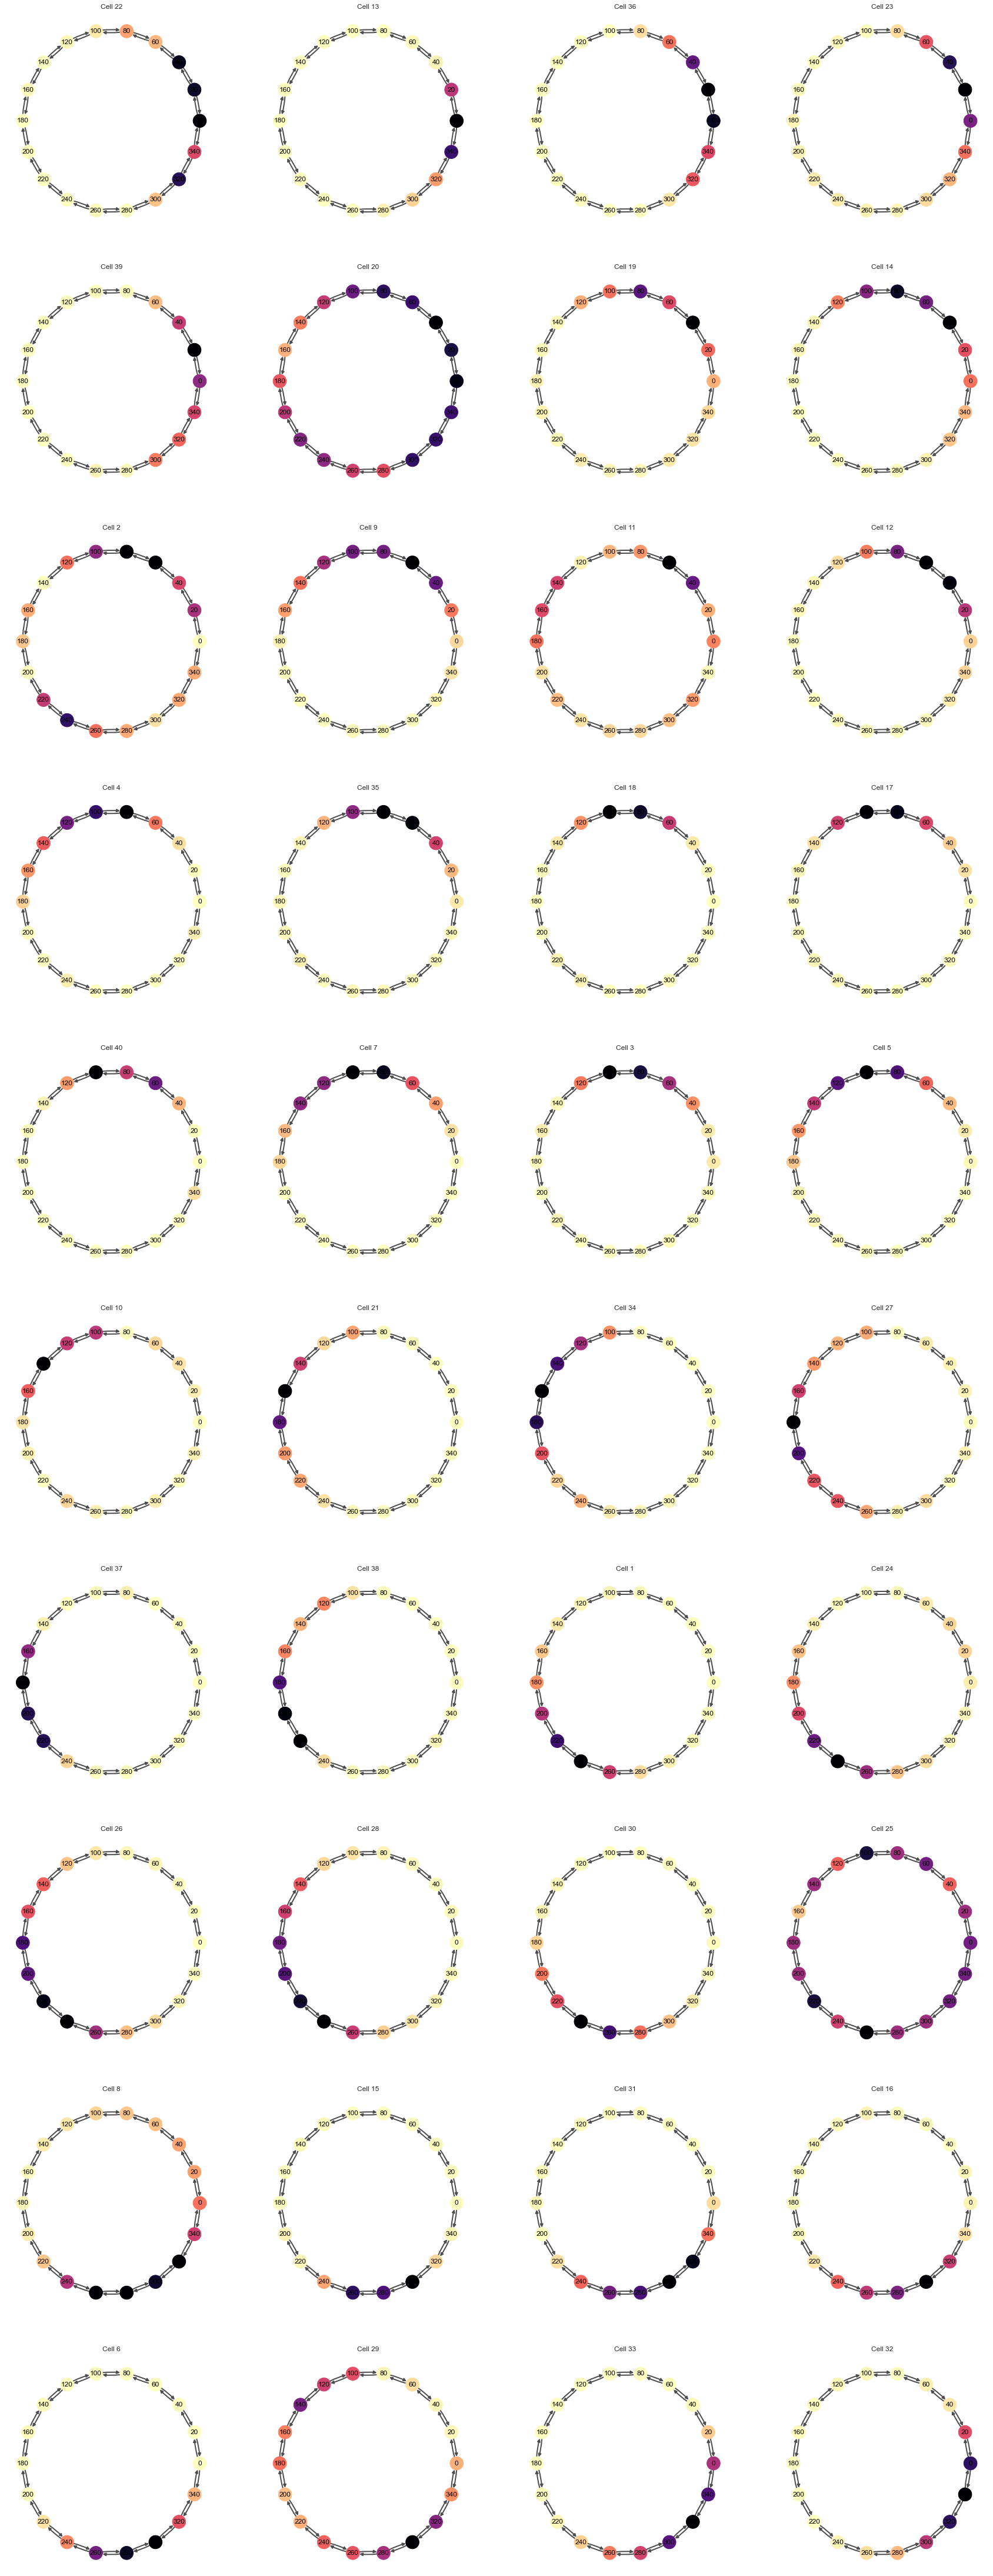

In [64]:
plt.figure(figsize=(30, 80))
for i in range(dists.shape[0]):
    plt.subplot(10, 4, i+1)
    idx = max_orientations[i]
    plot_activity_on_graph(list(np.arange(0, 380, 20)), dists[idx])
    plt.title("Cell {}".format(idx+1))
plt.savefig("place_cell_distributions.pdf")

In [398]:
entropy = np.sum(- dists * np.log(dists + 1e-10), axis=-1)

In [401]:
uniform = np.ones(len(bins)) / len(bins)
uniform_entropy = np.sum(- uniform * np.log(uniform + 1e-10), axis=-1)

In [402]:
uniform_entropy

2.890371756096165

In [403]:
entropy

array([1.83077478, 2.45789563, 1.69267976, 1.86009223, 1.96755109,
       1.69841097, 1.8888788 , 2.34725955, 2.12670854, 1.8575993 ,
       2.46525969, 1.84477723, 1.48831814, 2.06035445, 1.50435363,
       1.82943169, 1.64447385, 1.44409531, 2.08590322, 2.81035617,
       1.76535775, 1.90731756, 1.98217955, 2.10484903, 2.82213488,
       2.14348138, 2.17964634, 2.15020074, 2.56183158, 1.79840238,
       1.86383291, 1.87852472, 1.95116968, 1.91634478, 1.79661914,
       1.80764201, 1.5279013 , 1.72878727, 1.83774051, 1.53315336])

In [404]:
idxs = np.argsort(entropy)

In [405]:
entropy[idxs]

array([1.44409531, 1.48831814, 1.50435363, 1.5279013 , 1.53315336,
       1.64447385, 1.69267976, 1.69841097, 1.72878727, 1.76535775,
       1.79661914, 1.79840238, 1.80764201, 1.82943169, 1.83077478,
       1.83774051, 1.84477723, 1.8575993 , 1.86009223, 1.86383291,
       1.87852472, 1.8888788 , 1.90731756, 1.91634478, 1.95116968,
       1.96755109, 1.98217955, 2.06035445, 2.08590322, 2.10484903,
       2.12670854, 2.14348138, 2.15020074, 2.17964634, 2.34725955,
       2.45789563, 2.46525969, 2.56183158, 2.81035617, 2.82213488])

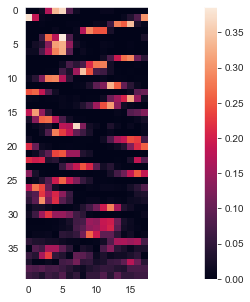

In [407]:
sns.set_style("dark")
plt.figure(figsize=(20, 5))
plt.imshow(dists[idxs])
plt.colorbar()

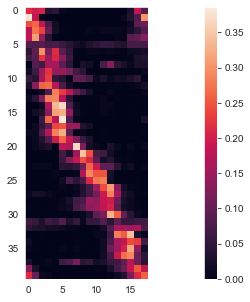

In [218]:
sns.set_style("dark")
plt.figure(figsize=(20, 5))
plt.imshow(dists[max_orientations])
plt.colorbar()

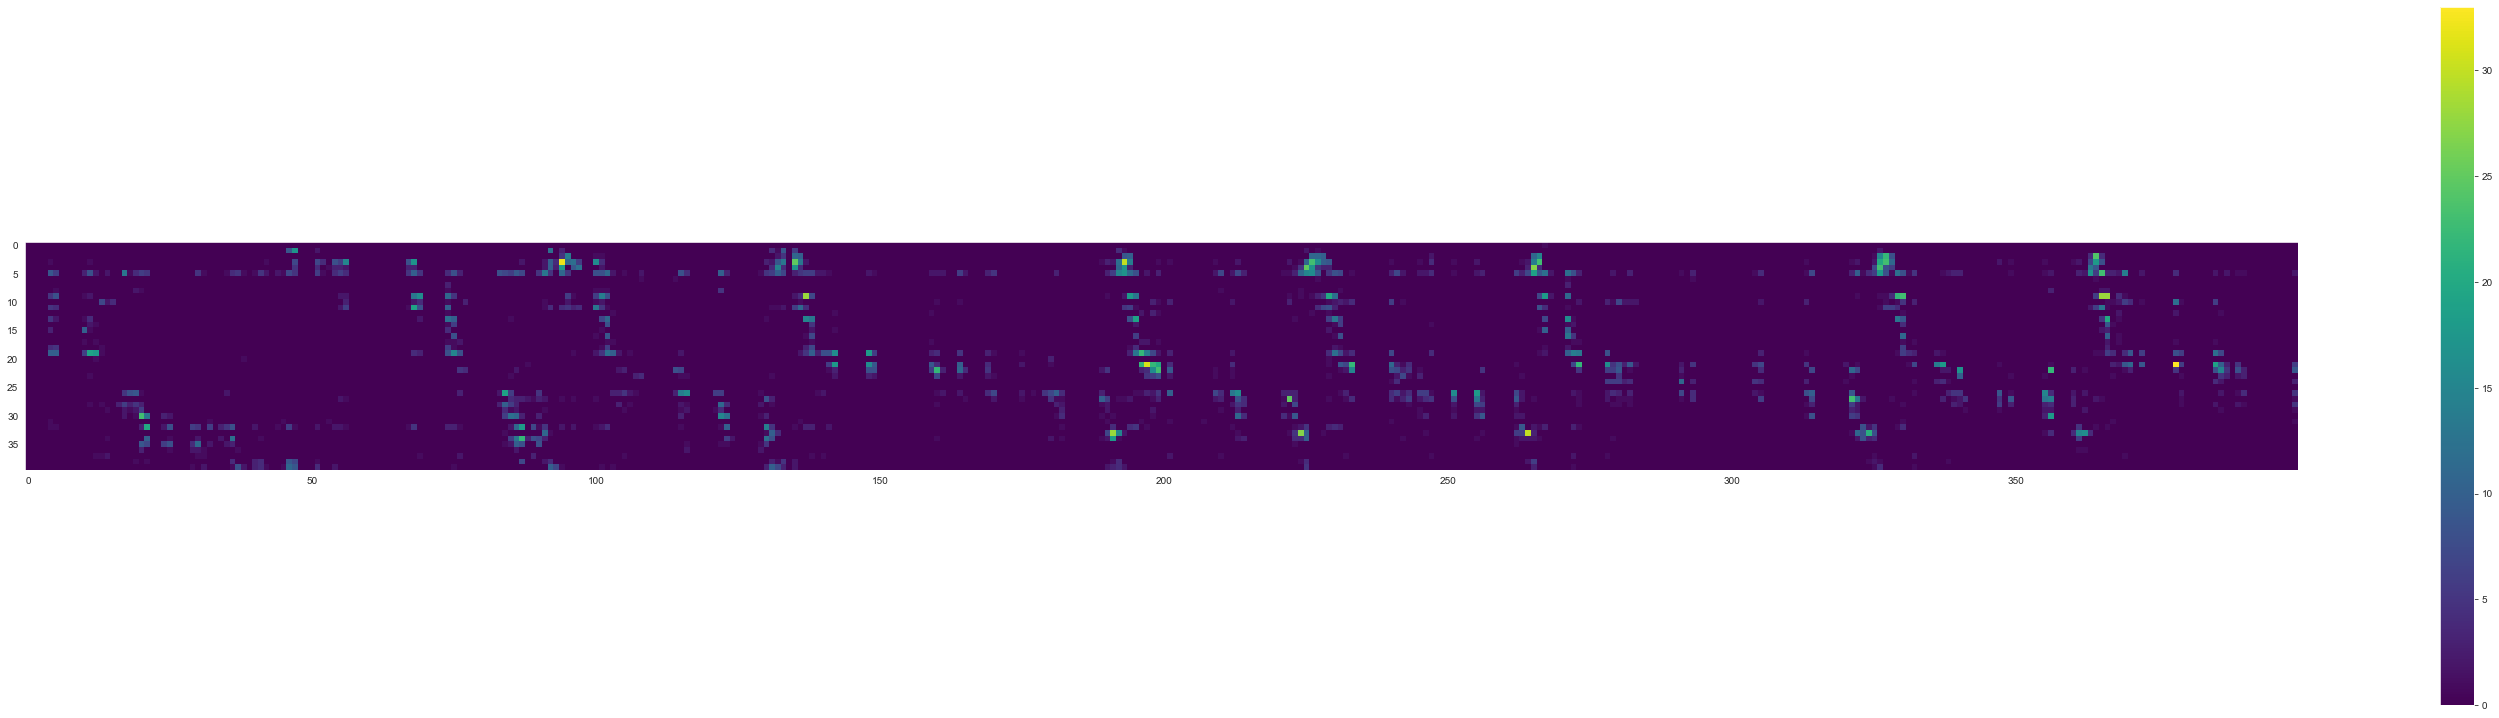

In [222]:
plt.figure(figsize = (40, 10))
plt.imshow(place_cells[500:900, max_orientations].T, cmap="viridis")
plt.tight_layout()
plt.colorbar()

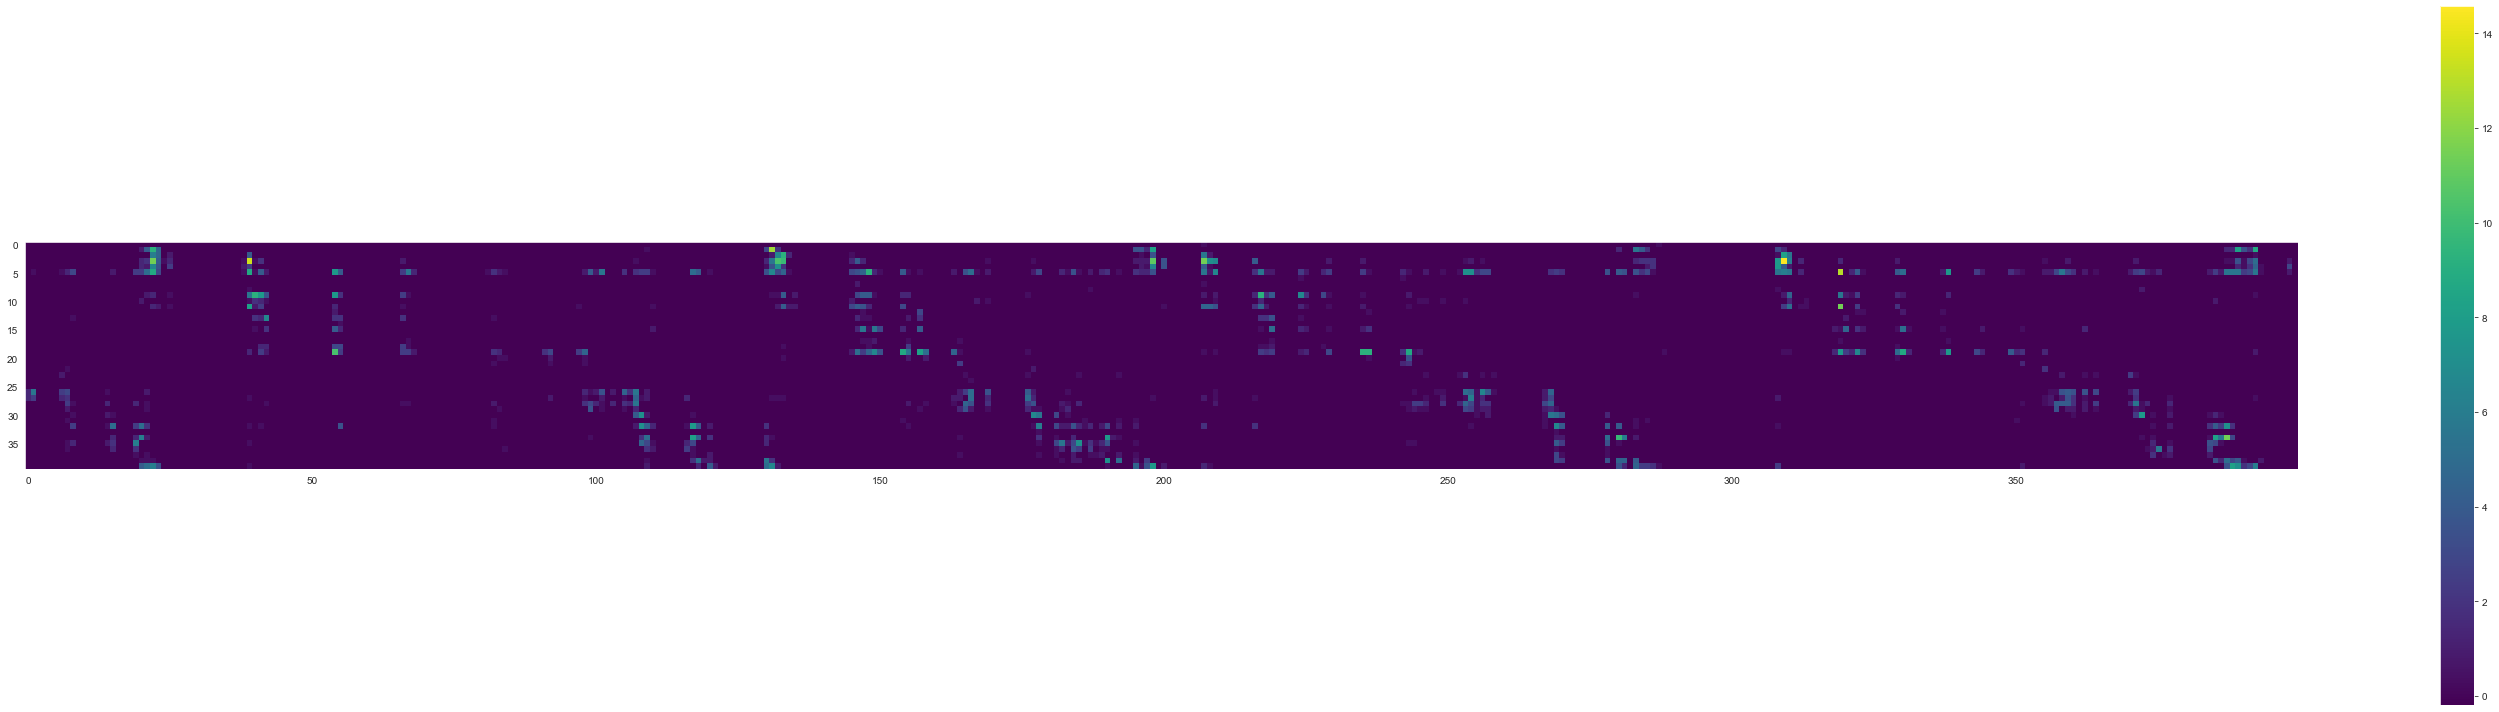

In [266]:
sns.set_style("dark")
plt.figure(figsize = (40, 10))
plt.imshow(place_cells_normalized[1000:1400, max_orientations].T, cmap="viridis")
plt.tight_layout()
plt.colorbar()

In [247]:
np.argmax(place_cells, axis=-1).shape

(2953,)

In [252]:
x = [np.cos(np.rad2deg(x)) for x in mod360_encangles]
y = [np.sin(np.rad2deg(x)) for x in mod360_encangles]
max_neuron = [np.argmax(x) for x in place_cells[:, max_orientations]]
map_df = pd.DataFrame({"x": x, "y": y, "velocity": averaged_velocity, "max_neuron": max_neuron})

In [258]:
filtered_timesteps = [i for i, x in enumerate(place_cells) if place_cells.max(axis=-1)[i] > 0]
x_f = [x[i] for i in filtered_timesteps]
y_f = [y[i] for i in filtered_timesteps]
max_neuron_f = [max_neuron[i] for i in filtered_timesteps]
vel_f = [averaged_velocity[i] for i in filtered_timesteps]
map_df_f = pd.DataFrame({"x": x_f, "y": y_f, "velocity": vel_f, "max_neuron": max_neuron_f})

In [255]:
place_cells.max(axis=-1)[:10]

array([28., 19., 13.,  5.,  1.,  2., 10.,  7.,  0.,  0.])

In [235]:
len(x)

2953

In [237]:
len(averaged_velocity)

2953

In [232]:
discrete_angles

array([140, 140, 160, ...,  40,  60,  60])

<AxesSubplot:xlabel='x', ylabel='y'>

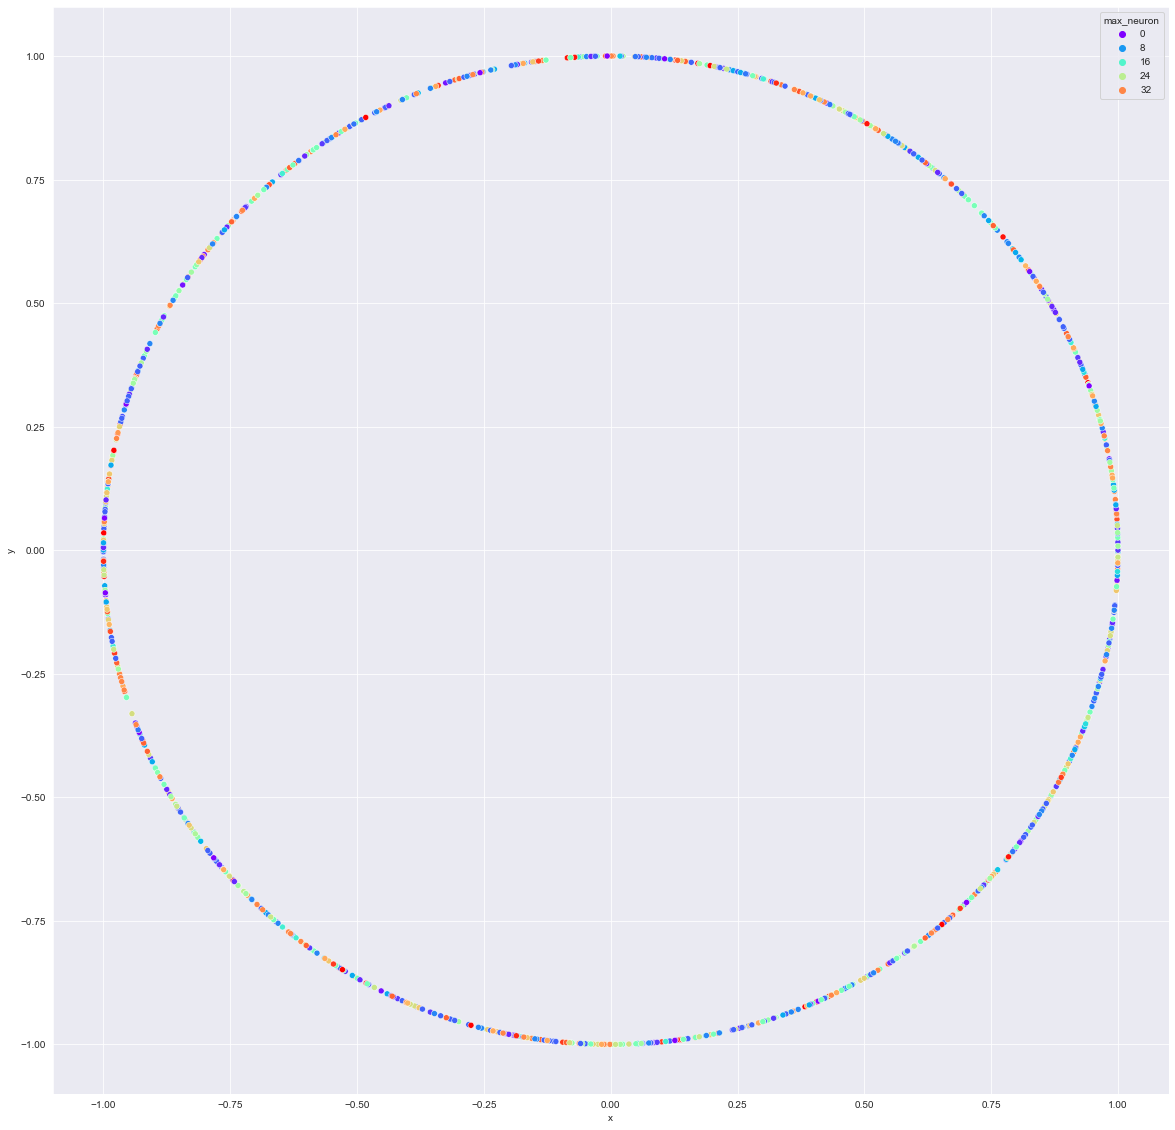

In [261]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 20))
sns.scatterplot(x="x", y="y", hue="max_neuron", data=map_df_f, palette="rainbow")

<AxesSubplot:xlabel='x', ylabel='y'>

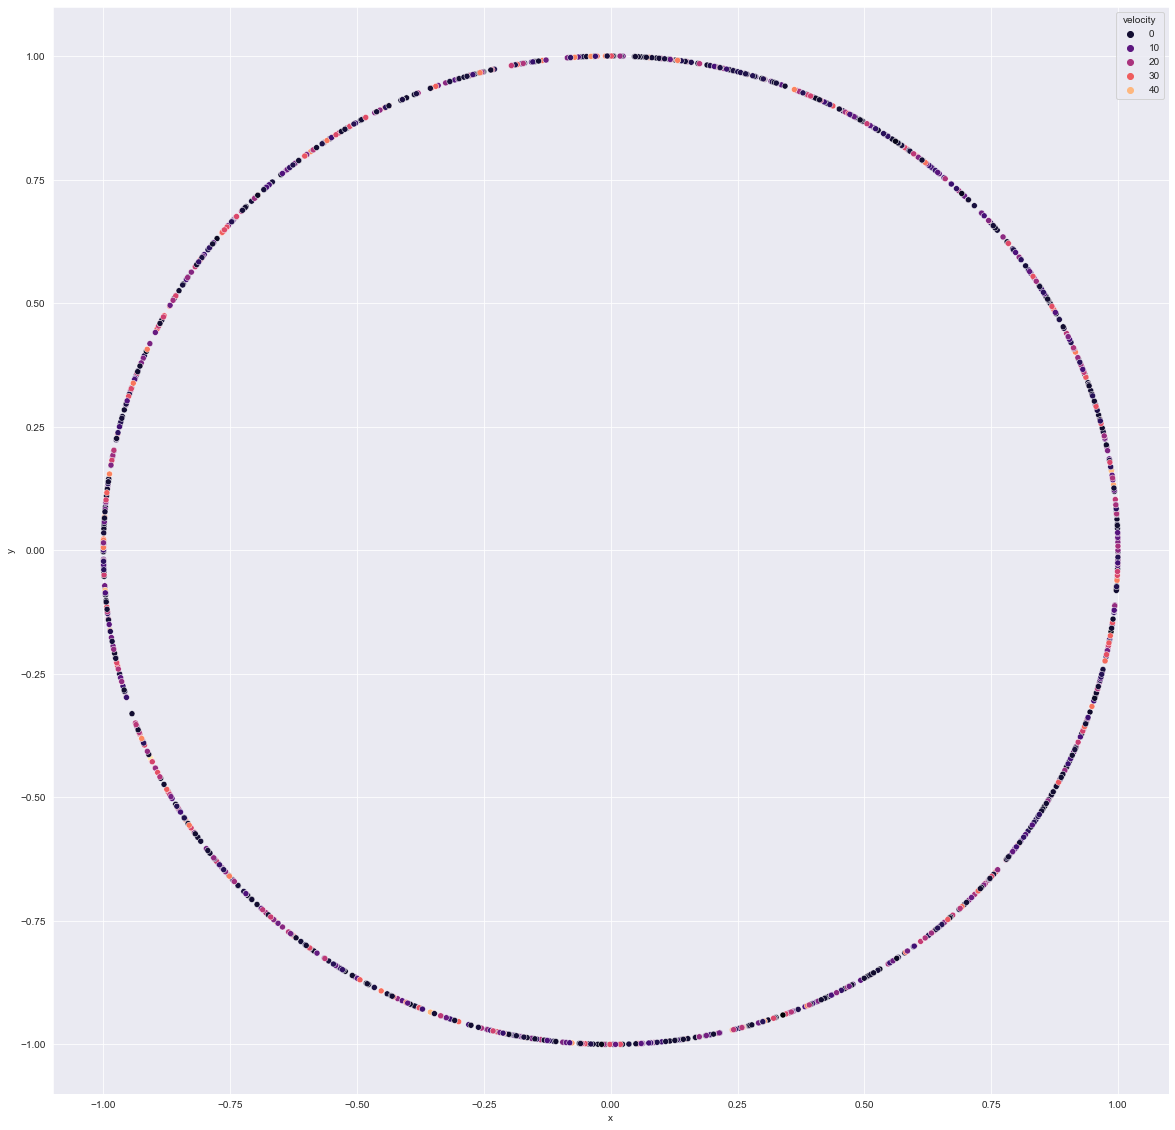

In [263]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 20))
sns.scatterplot(x="x", y="y", hue="velocity", data=map_df_f, palette="magma")

In [409]:
# plt.figure(figsize = (40, 10))
# plt.imshow(place_cells[100:400,idxs].T, cmap="viridis")
# plt.tight_layout()
# plt.colorbar()

## PCA

In [149]:
mod = PCA(n_components=2)
embedding_pca = mod.fit_transform(place_cells_normalized)

In [485]:
mod3 = PCA(n_components=3)
embedding_pca3 = mod3.fit_transform(place_cells_normalized)

In [488]:
modn = PCA(n_components=place_cells_normalized.shape[1])
embedding_pcan = modn.fit_transform(place_cells_normalized)

In [150]:
pca_df = pd.DataFrame({"dim1": embedding_pca[:, 0], "dim2": embedding_pca[:, 1], "angle": mod360_encangles})

In [484]:
mod.explained_variance_

array([8.58191266, 5.40441946])

In [487]:
mod3.explained_variance_

array([8.58191266, 5.40441946, 4.27139607])

In [493]:
modn.explained_variance_[:10]

array([8.58191266, 5.40441946, 4.27139607, 2.86467527, 2.56074654,
       2.11318693, 1.81441338, 1.67677463, 1.04562594, 0.88790082])

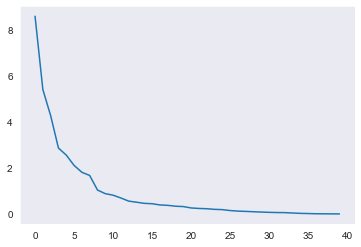

In [490]:
plt.plot(modn.explained_variance_)

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

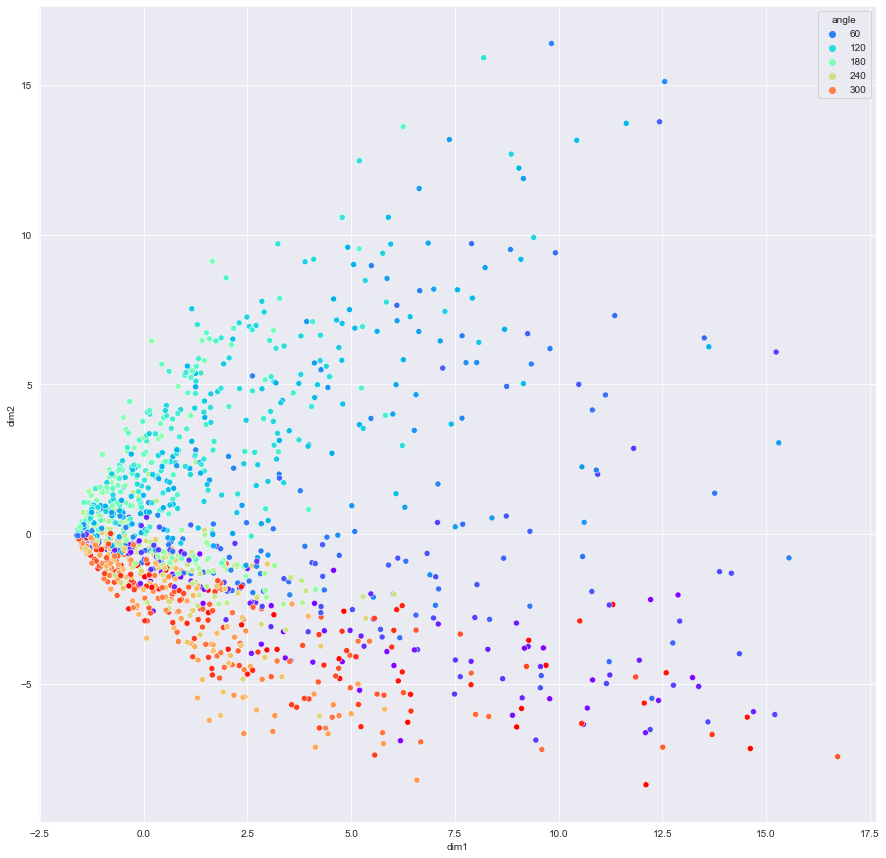

In [152]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=pca_df, palette="rainbow")

# ICA

In [153]:
ica_mod = FastICA(n_components=2)
embedding_ica = ica_mod.fit_transform(place_cells_normalized)

/Users/sophia/opt/anaconda3/envs/abn/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


In [480]:
ica_df = pd.DataFrame({"dim1": embedding_ica[:, 0], "dim2": embedding_ica[:, 1], "angle": mod360_encangles, "velocity": binned_velocity})

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

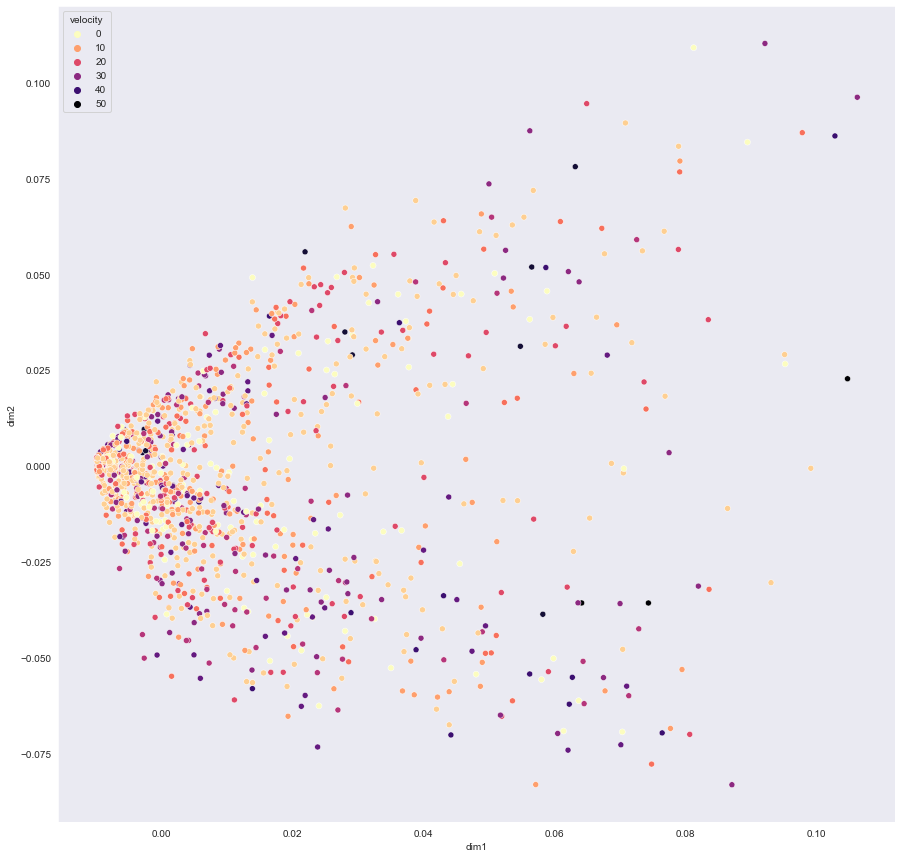

In [483]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="velocity", data=ica_df, palette="magma_r")

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

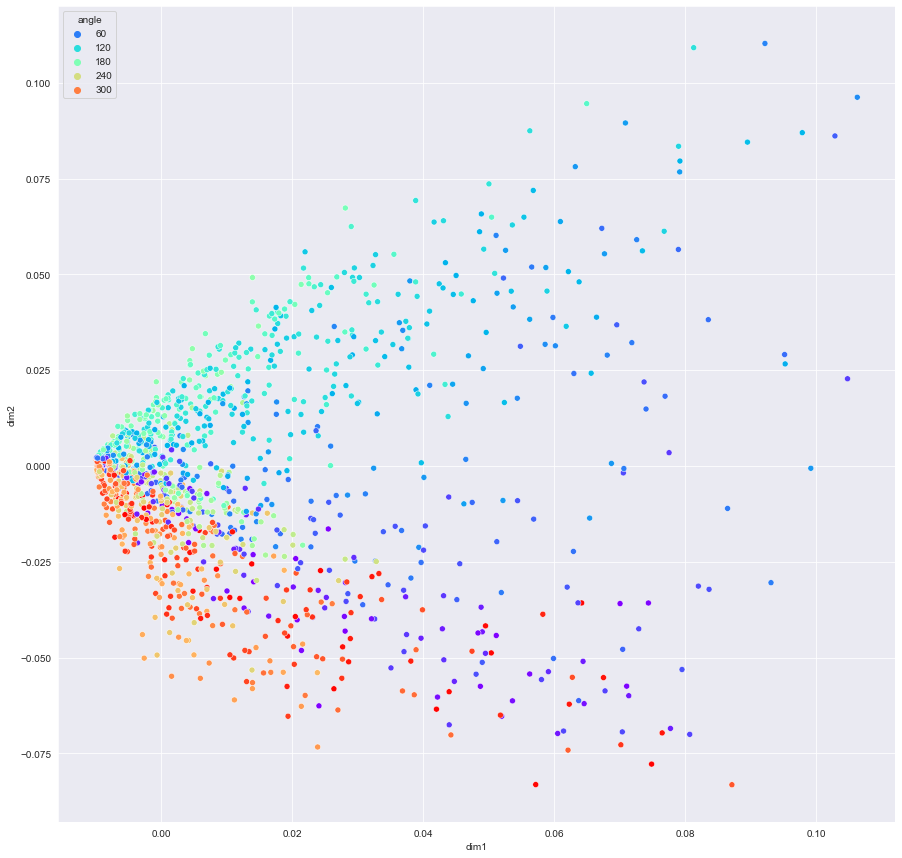

In [155]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=ica_df, palette="rainbow")

## LLE

In [410]:
lle_mod = LocallyLinearEmbedding(n_neighbors=40)
embedding_lle = lle_mod.fit_transform(place_cells_normalized)

In [411]:
lle_df = pd.DataFrame({"dim1": embedding_lle[:, 0], "dim2": embedding_lle[:, 1], "angle": discrete_angles})

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

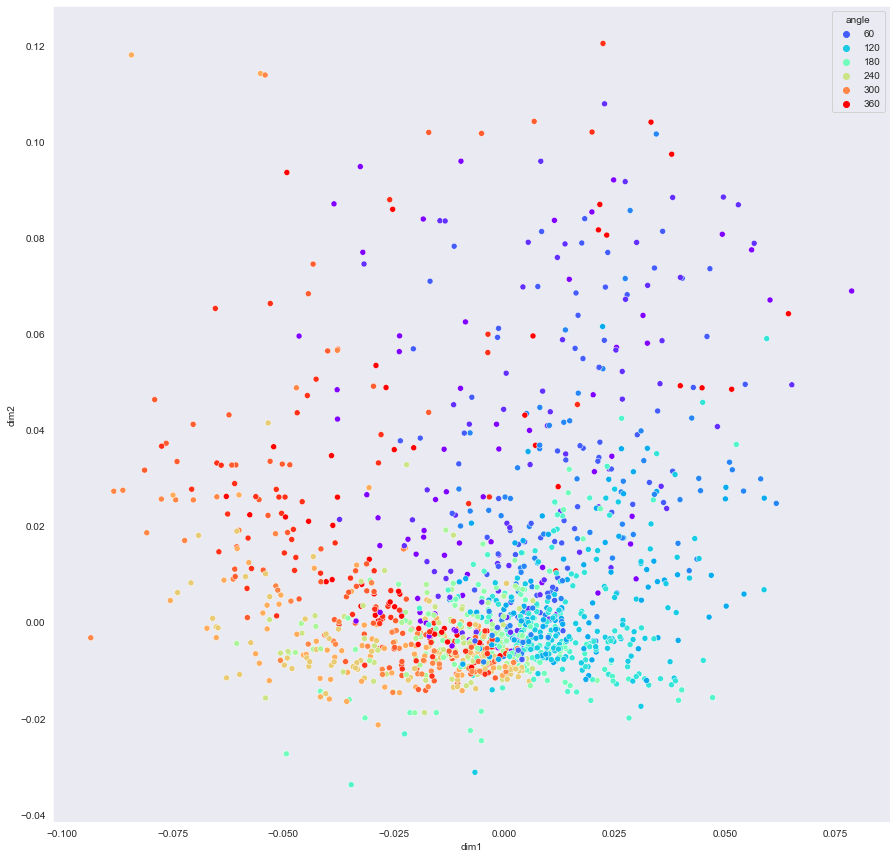

In [414]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=lle_df, palette="rainbow")

## TSNE

In [422]:
# len(velocity)

296299

In [415]:
tsne_mod = TSNE()
tsne_embedding = reducer.fit_transform(place_cells_normalized)

In [471]:
tsne_df = pd.DataFrame({"dim1": tsne_embedding[:, 0], "dim2": tsne_embedding[:, 1], "angle": discrete_angles, "velocity": binned_velocity})

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

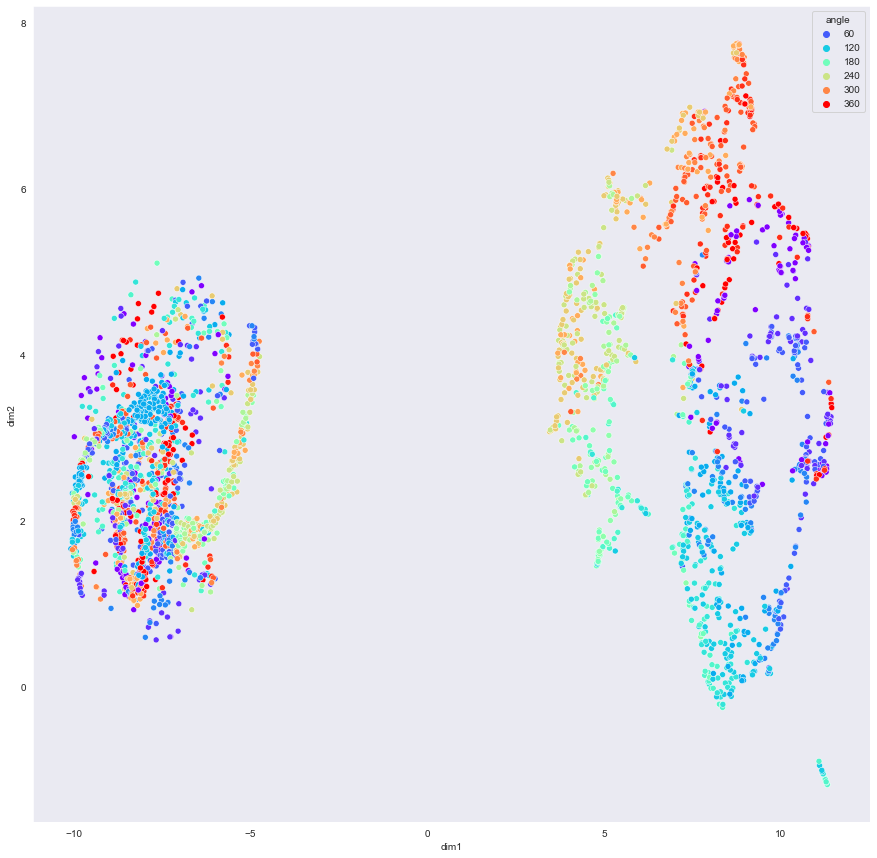

In [418]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=tsne_df, palette="rainbow")

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

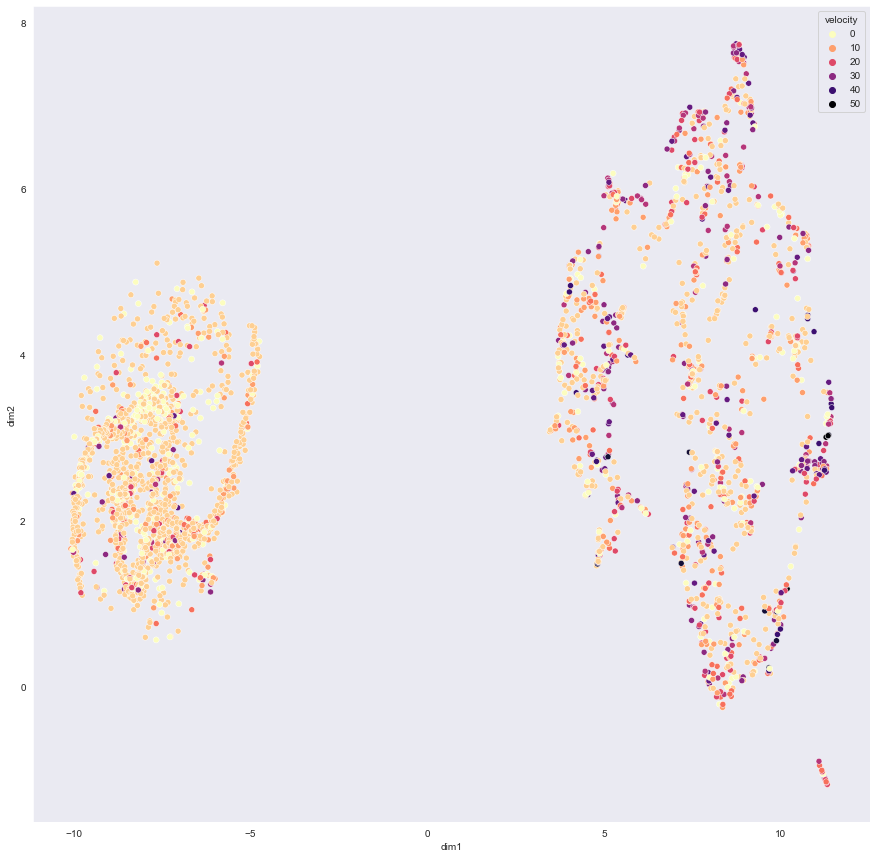

In [474]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="velocity", data=tsne_df, palette="magma_r")

## UMAP

In [476]:
reducer = UMAP(n_neighbors=10)
umap_embedding = reducer.fit_transform(place_cells_normalized)

In [477]:
umap_df = pd.DataFrame({"dim1": umap_embedding[:, 0], "dim2": umap_embedding[:, 1], "angle": mod360_encangles, "velocity": binned_velocity})

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

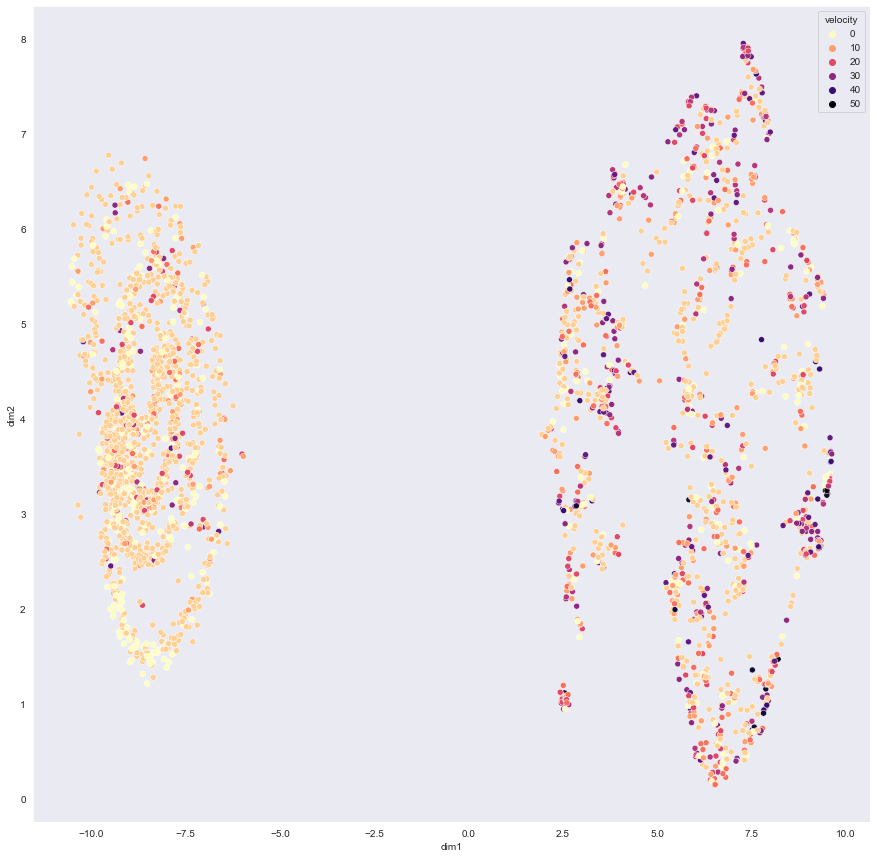

In [479]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="velocity", data=umap_df, palette="magma_r")

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

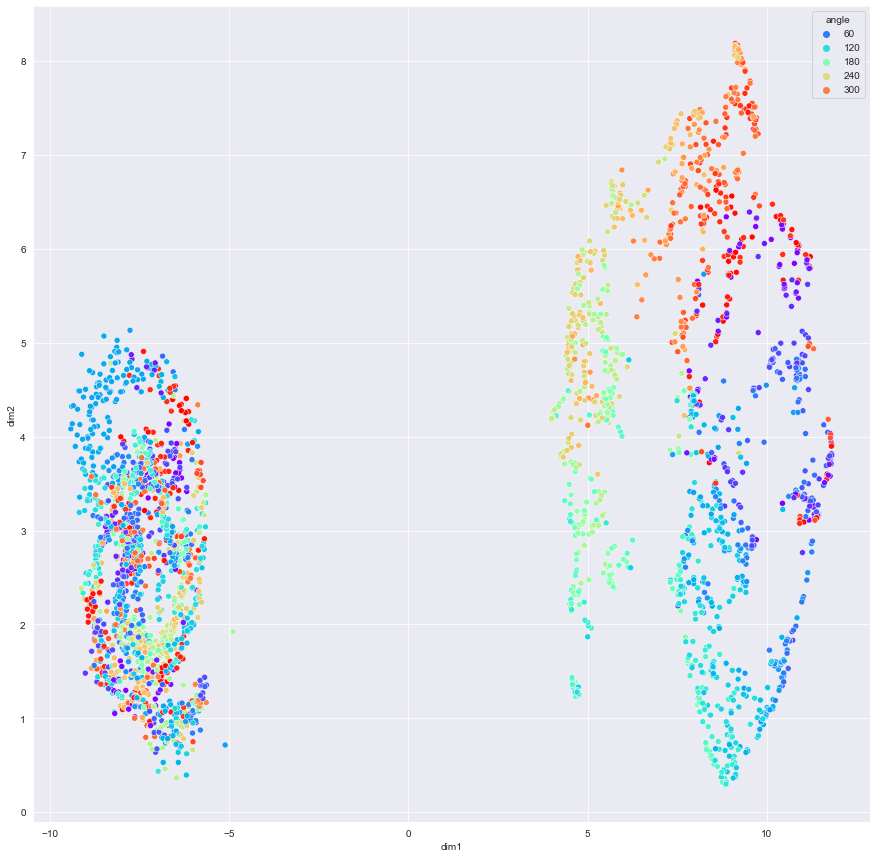

In [85]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=umap_df, palette="rainbow")

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

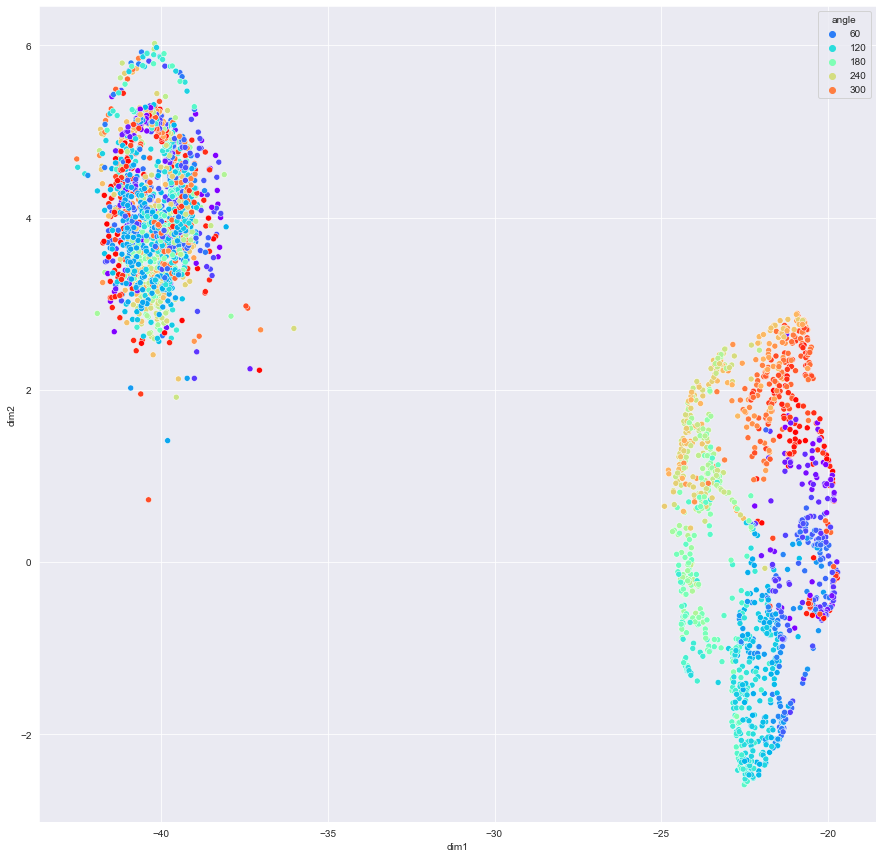

In [ ]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=umap_df, palette="rainbow")

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

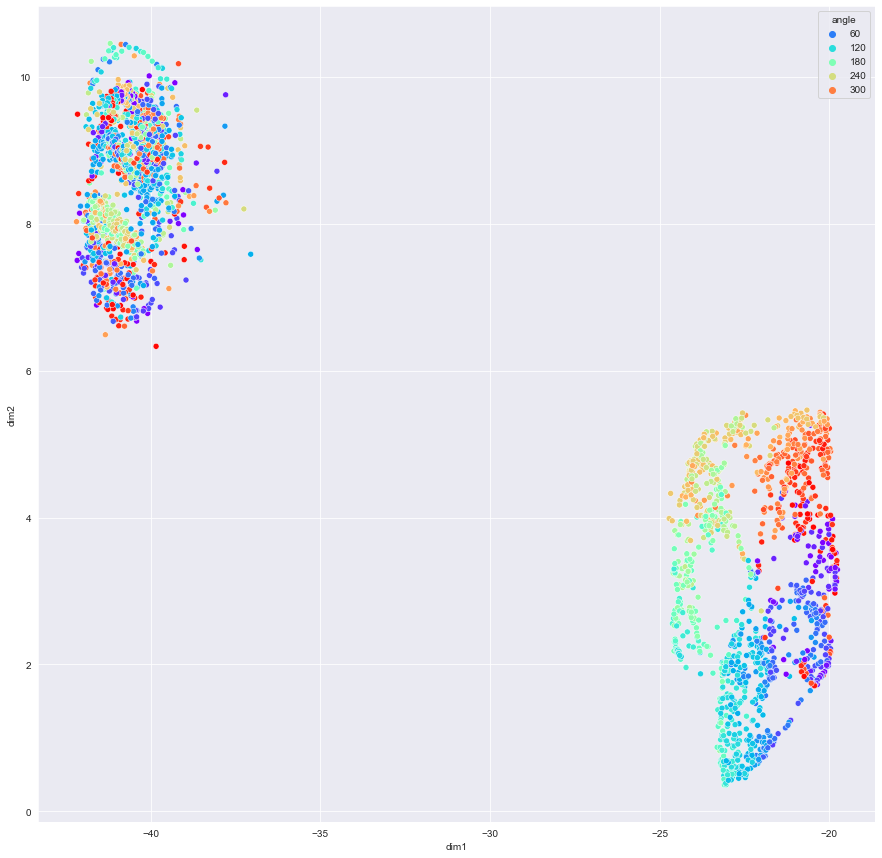

In [75]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="dim1", y="dim2", hue="angle", data=umap_df, palette="rainbow")